<a href="https://colab.research.google.com/github/almir1512/ConflictSense/blob/master/cluster_reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

df = pd.read_csv('/content/gdrive/MyDrive/Synapse/RP/New Dataset/reddit_entity.csv')
df

,subreddit,title,score,comments,num_comments,senti_score,normalized_senti_score,entities,comment_bodies
0,news,joe biden elected president united states,365127,[{'comment_body': 'election may subtle lesson ...,68,-0.037904,-0.000557,"['joe biden', 'united states']",['election may subtle lesson political theory ...
1,news,chauvin found guilty murder manslaughter georg...,250275,[{'comment_body': 'bail revoked jail sentencin...,45,-28.329511,-0.629545,"['chauvin', 'george floyd']","['bail revoked jail sentencing trial', 'short ..."
2,news,president donald trump says tested positive co...,233323,[{'comment_body': 'season finale gon na fuckin...,95,-70.046125,-0.737328,['donald trump'],['season finale gon na fucking fire never shot...
3,news,blizzard employees staged walkout company bann...,226322,[{'comment_body': 'absolutely amazing blizzard...,52,-34.666922,-0.666672,"['blizzard', 'hong kong']",['absolutely amazing blizzard blew whole thing...
4,news,trump left white house last time president,222633,[{'comment_body': 'one day like miracle disapp...,74,-38.017641,-0.513752,"['trump', 'white house']","['one day like miracle disappear', '3 wives 2 ..."
...,...,...,...,...,...,...,...,...,...
6878,internationalpolitics,money trail explains backing israel eager fund...,226,[{'comment_body': 'traitors every one bows izr...,16,-14.061218,-0.878826,"['israel', 'israel', 'gaza']","['traitors every one bows izraeli influence', ..."
6879,internationalpolitics,white house position aftermath international c...,210,[{'comment_body': 'got ta love international l...,27,-26.693055,-0.988632,"['white house', 'international criminal court'...",['got ta love international law means nothing'...
6880,internationalpolitics,protestor called biden hypocrisy funding genoc...,208,[{'comment_body': 'nra doesnt send democrats n...,19,-17.025138,-0.896060,"['bid', 'bid', '##en son']",['nra doesnt send democrats nearly much money ...
6881,FOXNEWS,anyone successfully deprogrammed friends famil...,206,[{'comment_body': 'make deal tell watch fox ne...,68,-67.775258,-0.996695,['fox news'],['make deal tell watch fox news whole week wat...


In [ ]:
embeddings_df = pd.read_csv('/content/gdrive/MyDrive/Synapse/RP/New Dataset/embedding_small.csv')
embeddings_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,0,-0.022610,-0.000162,0.031245,-0.079411,0.034523,0.040004,-0.004296,-0.001678,0.012716,...,0.126453,-0.025969,-0.002256,0.040195,-0.031070,0.024392,0.001297,0.023164,-0.049381,0.020688
1,0,-0.034082,0.068976,-0.017805,-0.021205,-0.035805,-0.062257,0.052474,-0.078583,0.037905,...,-0.055611,-0.059670,0.066202,0.007606,0.015846,-0.074213,0.050232,-0.020607,-0.048975,0.044148
2,0,-0.090020,0.116443,0.024915,0.020326,-0.024669,-0.010579,0.101195,-0.042100,-0.006570,...,-0.004253,-0.125280,-0.020845,-0.004571,0.030659,0.018743,-0.033020,-0.025439,-0.055869,0.054984
3,0,0.005836,-0.031569,-0.034751,-0.032352,-0.011634,0.032762,0.059766,-0.075947,-0.128411,...,0.094201,0.026306,0.025458,-0.052510,-0.033439,0.029527,0.012233,0.026663,0.095735,0.065748
4,0,0.018858,0.016146,0.083658,-0.036321,0.050237,0.002769,0.017224,0.023954,-0.021153,...,0.139302,-0.048491,-0.000220,-0.066122,-0.054068,0.030990,0.082822,0.010683,0.063150,-0.029162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565825,6882,0.060308,0.015051,0.062467,-0.059246,-0.001561,-0.007062,-0.039005,-0.058444,-0.057546,...,0.133005,0.000064,-0.021661,0.027907,-0.001930,0.058947,0.118216,0.025500,0.028691,-0.017208
565826,6882,-0.020358,-0.040993,0.001635,-0.056959,-0.025321,-0.052039,-0.004805,0.013816,-0.061841,...,0.067316,-0.062525,-0.041569,0.081429,0.052940,0.032906,0.105820,-0.024351,0.076192,0.008811
565827,6882,0.028988,0.078502,0.058548,-0.091263,-0.022269,-0.050377,0.045453,-0.033598,-0.015862,...,0.137156,0.033058,-0.102099,-0.059440,0.012520,0.167962,0.010576,-0.043585,-0.144284,0.027518
565828,6882,-0.011156,0.084174,0.010475,0.003530,-0.025276,-0.010441,0.024096,-0.034413,0.015180,...,0.068349,0.026033,0.052567,-0.035297,-0.065992,0.000515,0.045886,-0.029233,0.063593,0.013510


In [ ]:
embeddings_df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [ ]:
import ast
df['entities'] = df['entities'].apply(ast.literal_eval)

In [ ]:
entities_list = df['entities'].tolist()

# Flatten the list if entities are in list of lists format
entities = [entity for sublist in entities_list for entity in sublist]

# Label encode the entities
le = LabelEncoder()
le.fit(entities)

# Transform entities to label encoded format
X_entities_labeled = [le.transform(entity) for entity in entities_list]

In [ ]:
print(len(X_entities_labeled))

6883


In [ ]:

def get_sentiment_scores(df):
    return df['normalized_senti_score'].tolist()

def find_embeddings_for_index(index, embeddings_df):
    return embeddings_df[embeddings_df['Index'] == index].iloc[:, 1:].values

def stack_embeddings(embeddings_for_row):
    if len(embeddings_for_row) > 0:
        return np.vstack(embeddings_for_row)
    return None

def process_data(df, embeddings_df):
    X_senti_scores = get_sentiment_scores(df)
    X_embeddings = []

    for j in range(len(df)):
        embeddings_for_row = find_embeddings_for_index(j, embeddings_df)
        stacked_embeddings = stack_embeddings(embeddings_for_row)
        if stacked_embeddings is not None:
            X_embeddings.append(stacked_embeddings)

    return X_senti_scores, X_embeddings

X_senti_scores, X_embeddings = process_data(df, embeddings_df)

In [ ]:
# Convert sentiment scores to array
X_senti_scores = np.array(X_senti_scores)

# Pad embeddings to make sure all arrays have the same shape
max_len = max(emb.shape[0] for emb in X_embeddings) if X_embeddings else 0
padded_embeddings = [np.pad(emb, ((0, max_len - emb.shape[0]), (0, 0)), 'constant') for emb in X_embeddings]

# Convert the list of padded embeddings to an array
X_embeddings_padded = np.array(padded_embeddings)

# Print shapes to verify
print("Sentiment scores shape:", X_senti_scores.shape)
print("Padded embeddings shape:", X_embeddings_padded.shape)


Sentiment scores shape: (6883,)
Padded embeddings shape: (6883, 467, 384)


In [ ]:
max_embedding_length = max(len(embedding) for embedding in X_embeddings_padded)

# Function to pad arrays to the maximum length
def pad_array(array, max_length):
    return np.pad(array, (0, max_length - len(array)), 'constant')

X_combined = []

for idx in range(len(X_entities_labeled)):
    entity_labeled = X_entities_labeled[idx]
    senti_score = X_senti_scores[idx]
    embedding = X_embeddings_padded[idx]

    # Pad the entity_labeled array to match the embedding length
    padded_entity = pad_array(entity_labeled, max_embedding_length)

    # Reshape the senti_score to match the embedding length
    reshaped_senti_score = np.repeat(senti_score, max_embedding_length)

    # Create a combined array for each row
    combined = np.column_stack((padded_entity, reshaped_senti_score, embedding))
    X_combined.append(combined)

# Convert combined list to array
X_combined = np.array(X_combined)

print("Combined shape:", X_combined.shape)

Combined shape: (6883, 467, 386)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming X_combined is your input data
input_shape = X_combined.shape[1:]

# Encoder
input_layer = layers.Input(input_shape)
x = layers.Flatten()(input_layer)
encoded = layers.Dense(128, activation='relu')(x)  # Latent space dimension can be adjusted

# Decoder
x = layers.Dense(np.prod(input_shape), activation='relu')(encoded)
decoded = layers.Reshape(input_shape)(x)

# Autoencoder model
autoencoder = models.Model(input_layer, decoded)

# Compile the model with an appropriate loss function
autoencoder.compile(optimizer='adam', loss='mse')

# Print the model summary
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 467, 386)]        0         
                                                                 
 flatten (Flatten)           (None, 180262)            0         
                                                                 
 dense (Dense)               (None, 128)               23073664  
                                                                 
 dense_1 (Dense)             (None, 180262)            23253798  
                                                                 
 reshape (Reshape)           (None, 467, 386)          0         
                                                                 
Total params: 46327462 (176.73 MB)
Trainable params: 46327462 (176.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Normalize X_combined if necessary
X_combined_normalized = X_combined / np.max(X_combined)

# Train the autoencoder
autoencoder.fit(X_combined_normalized, X_combined_normalized,
                epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
173/173 [==============================] - 39s 218ms/step - loss: 3.5061e-06 - val_loss: 3.0137e-06
Epoch 2/30
173/173 [==============================] - 35s 202ms/step - loss: 2.3733e-06 - val_loss: 1.9109e-06
Epoch 3/30
173/173 [==============================] - 35s 204ms/step - loss: 1.6311e-06 - val_loss: 1.5459e-06
Epoch 4/30
173/173 [==============================] - 35s 205ms/step - loss: 1.3127e-06 - val_loss: 1.2642e-06
Epoch 5/30
173/173 [==============================] - 36s 207ms/step - loss: 9.8634e-07 - val_loss: 9.0212e-07
Epoch 6/30
173/173 [==============================] - 35s 204ms/step - loss: 6.6529e-07 - val_loss: 6.4626e-07
Epoch 7/30
173/173 [==============================] - 36s 208ms/step - loss: 4.5030e-07 - val_loss: 4.6374e-07
Epoch 8/30
173/173 [==============================] - 35s 203ms/step - loss: 3.2149e-07 - val_loss: 3.8503e-07
Epoch 9/30
173/173 [==============================] - 35s 202ms/step - loss: 2.7809e-07 - val_loss: 3.5243e-07
E

In [ ]:
# Extract the encoder part of the autoencoder
encoder = models.Model(input_layer, encoded)

# Encode the combined features
X_encoded = encoder.predict(X_combined_normalized)

# Print the shape of encoded features
print("Encoded features shape:", X_encoded.shape)


216/216 [==============================] - 1s 6ms/step
Encoded features shape: (6883, 128)


In [ ]:
xx1= X_encoded.copy()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# code here
pc=PCA(n_components=0.95,random_state=42)
pc.fit(xx1)
X_pca=pc.transform(xx1)

In [ ]:
X_pca.shape

(6883, 4)

In [ ]:

!pip install exkmc yellowbrick -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from ExKMC.Tree import Tree
from IPython.display import Image, display
from ipywidgets import interact
import os
import warnings
warnings.filterwarnings("ignore")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
## Perform K-Means clustering with interactive widget
def kmeans_clustering(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

interact(kmeans_clustering, num_clusters=(2, 6, 1))

interactive(children=(IntSlider(value=4, description='num_clusters', max=6, min=2), Output()), _dom_classes=('…

<function __main__.kmeans_clustering(num_clusters)>

In [ ]:
def kmeans_3d_clustering(num_clusters):
    kmeans_3d = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_3d_labels = kmeans_3d.fit_predict(X_pca)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_3d_labels, cmap='viridis', edgecolors='k')
    ax.set_xlabel('Feature 1 (Standardized)')
    ax.set_ylabel('Feature 2 (Standardized)')
    ax.set_zlabel('Feature 3 (Standardized)')
    ax.set_title('Kmeans Clustering (3D)')
    plt.show()

interact(kmeans_3d_clustering, num_clusters=(2, 6, 1))

interactive(children=(IntSlider(value=4, description='num_clusters', max=6, min=2), Output()), _dom_classes=('…

<function __main__.kmeans_3d_clustering(num_clusters)>

In [ ]:
# Perform DBSCAN clustering with interactive widget
def dbscan_clustering(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_pca)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.title('DBSCAN Clustering')
    plt.show()

interact(dbscan_clustering, eps=(0.1, 1.0, 0.1), min_samples=(1, 10, 1))

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.1), IntSlider(value=5, descript…

<function __main__.dbscan_clustering(eps, min_samples)>

In [ ]:
# Perform DBSCAN clustering with interactive widget
def dbscan_3d_clustering(eps, min_samples):
    dbscan_3d = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_3d_labels = dbscan_3d.fit_predict(X_pca)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=dbscan_3d_labels, cmap='viridis', edgecolors='k')
    ax.set_xlabel('Feature 1 (Standardized)')
    ax.set_ylabel('Feature 2 (Standardized)')
    ax.set_zlabel('Feature 3 (Standardized)')
    ax.set_title('DBSCAN Clustering (3D)')
    plt.show()

interact(dbscan_3d_clustering, eps=(0.1, 1.0, 0.1), min_samples=(1, 10, 1))

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.1), IntSlider(value=5, descript…

<function __main__.dbscan_3d_clustering(eps, min_samples)>

Elbow Method to determine the number of clusters to be formed:


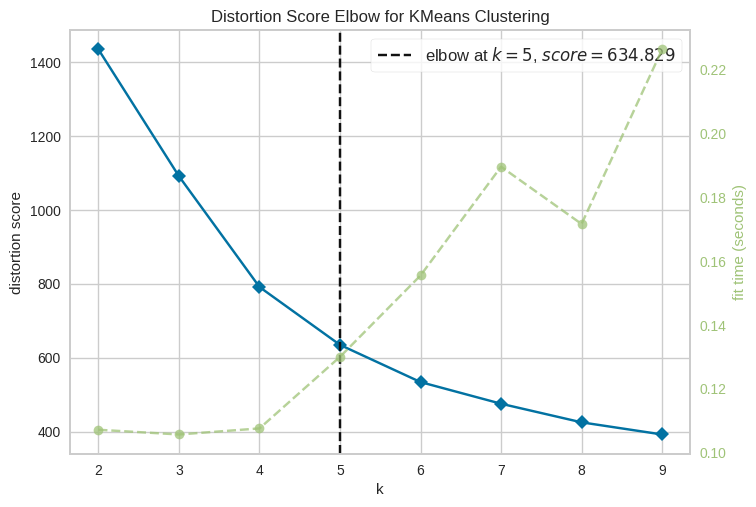

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')

Elbow_M = KElbowVisualizer(KMeans(), k=(2, 10))
Elbow_M.fit(X_pca)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


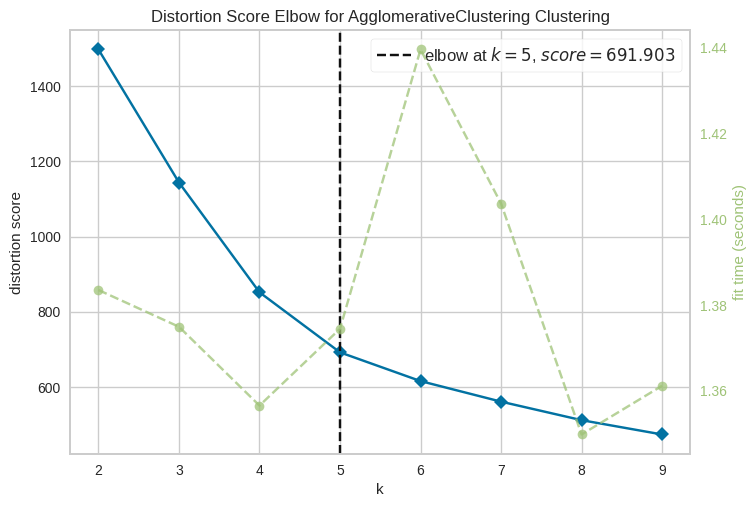

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')

Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=(2, 10))
Elbow_M.fit(X_pca)
Elbow_M.show()

In [ ]:
# Perform Agglomerative clustering with interactive widget
def agglomerative_clustering(num_clusters):
  agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
  agglomerative_labels = agglomerative.fit_predict(X_pca)

  plt.figure(figsize=(8, 6))
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_labels, cmap='viridis', edgecolors='k')
  plt.xlabel('Feature 1 (Standardized)')
  plt.ylabel('Feature 2 (Standardized)')
  plt.title('Agglomerative Clustering')
  plt.show()

interact(agglomerative_clustering, num_clusters=(2, 6, 1))

interactive(children=(IntSlider(value=4, description='num_clusters', max=6, min=2), Output()), _dom_classes=('…

<function __main__.agglomerative_clustering(num_clusters)>

In [ ]:
# Perform Agglomerative clustering with interactive widget
def agglomerative_3d_clustering(num_clusters):
    agglomerative_3d = AgglomerativeClustering(n_clusters=num_clusters)
    agglomerative_3d_labels = agglomerative_3d.fit_predict(X_pca)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=agglomerative_3d_labels, cmap='viridis', edgecolors='k')
    ax.set_xlabel('Feature 1 (Standardized)')
    ax.set_ylabel('Feature 2 (Standardized)')
    ax.set_zlabel('Feature 3 (Standardized)')
    ax.set_title('Agglomerative Clustering (3D)')
    plt.show()

interact(agglomerative_3d_clustering, num_clusters=(2, 6, 1))

interactive(children=(IntSlider(value=4, description='num_clusters', max=6, min=2), Output()), _dom_classes=('…

<function __main__.agglomerative_3d_clustering(num_clusters)>